
# Project: Investigate a TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, I provided a brief introduction to the dataset which I selected TMDb Movie data for analysis. During this research, I focused on two questions: 
 
 >- Which genres are most popular from year to year? Drama or Comedy? 
 >- Which genres had high revenues based on release year? Drama or Comedy?
 I built my report around the analysis of variables: genres, release year of films, and revenue of films.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#plan to use.

# inline with the notebook. See this page for more:
#  http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdbmovies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning (Replace this with more specific notes!)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#control null values
pd.DataFrame({'isnull': pd.isnull(df).sum(), 
              'dtype': df.dtypes}).sort_values('isnull', ascending=False)



,dtype,isnull
homepage,object,7930
tagline,object,2824
keywords,object,1493
production_companies,object,1030
cast,object,76
director,object,44
genres,object,23
imdb_id,object,10
overview,object,4
budget_adj,float64,0


In [6]:
#control cast & director null values  
df[(pd.isnull(df['cast'])) &
   (pd.isnull(df['director']))]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2397,241829,tt1805454,0.033048,0,0,The Making of The Walking Dead,NaN,NaN,NaN,NaN,...,The Making of the TV Series The Walking Dead,30,Documentary,NaN,7/31/10,42,8.4,2010,0.0,0.0
3369,77974,tt2014400,0.001682,0,0,Wizards On Deck With Hannah Montana,NaN,NaN,NaN,NaN,...,"Three Disney Channel shows come together in ""W...",68,Family,NaN,2/11/08,14,6.1,2008,0.0,0.0
3910,79976,tt2096615,0.002006,0,0,Steve Jobs: One Last Thing,NaN,NaN,NaN,NaN,...,Through interviews with colleagues and others ...,60,Documentary,NaN,11/2/11,11,6.6,2011,0.0,0.0
4939,168219,tt2167393,0.003183,0,0,The Men Who Built America,NaN,NaN,NaN,America wasn't discovered. It was built.,...,"John D. Rockefeller, Cornelius Vanderbilt, And...",360,Documentary|History,NaN,10/16/12,11,5.3,2012,0.0,0.0
5413,20378,tt0163986,0.324270,0,0,The Brave Little Toaster to the Rescue,NaN,NaN,NaN,NaN,...,Those fun-loving eletrical appliances from the...,74,Animation|Comedy|Family,NaN,11/1/97,11,7.0,1997,0.0,0.0
9593,46188,tt0220698,0.001662,0,0,Peter Pan,NaN,NaN,NaN,NaN,...,This animated fairy tale for kids tells the cl...,52,Action|Adventure|Animation|Family|Fantasy,Burbank Films Australia,1/1/88,28,6.6,1988,0.0,0.0


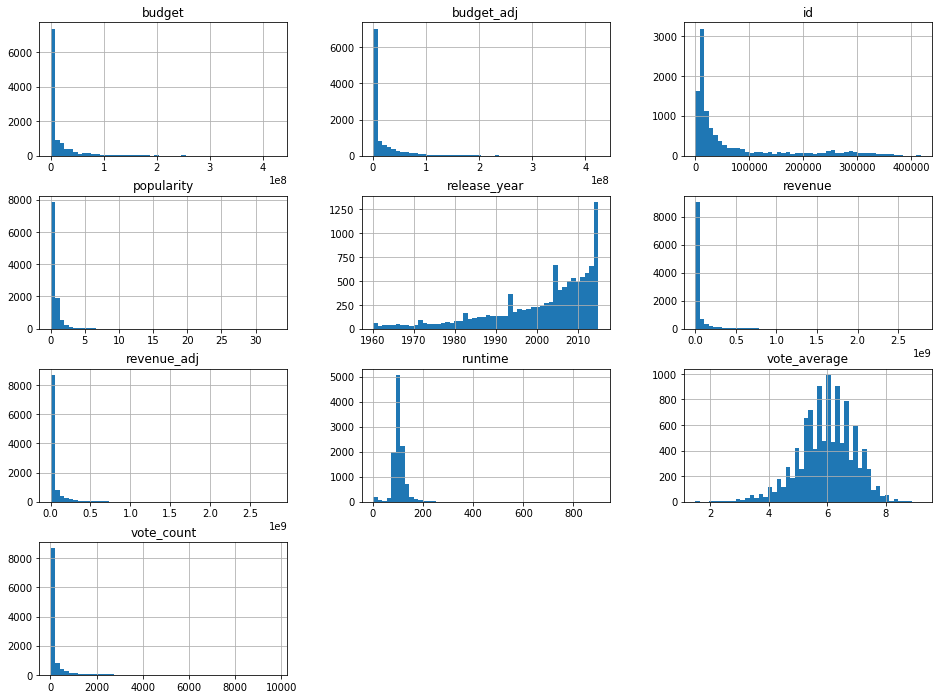

In [7]:
#histogram of columns
df.hist(bins=50, figsize=(16,12));

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
#cleaning of unnecessary columns of dataset
pd.set_option('display.max_columns', None)

columns_to_drop = ['imdb_id', 
                   'homepage', 
                   'tagline', 
                   'keywords', 
                   'overview', 
                   'production_companies' 
                   ]

df = df.drop(columns_to_drop, axis=1)

df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# Cleaning genres column

df = df.dropna(subset=['genres'])


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which genres are most popular from year to year? Drama or Comedy? 
>For more readable and understandable histogram, it is preffered to focus on only two genres in the dataset.

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

genres_list = []
#finding number of genres in dataset
for row in range(len(df)):
    try:
        value = df['genres'].iloc[row]
        genres_list = genres_list + value.split('|')
    except:
        print(row)
        print(value)
        break

genres_list
genres_unique = list(set(genres_list))

genres_count = []
for genre in genres_unique:
    count = genres_list.count(genre)
    genres_count.append((genre, count))
    

dict(genres_count)

{'Action': 2385,
 'Adventure': 1471,
 'Animation': 699,
 'Comedy': 3793,
 'Crime': 1355,
 'Documentary': 520,
 'Drama': 4761,
 'Family': 1231,
 'Fantasy': 916,
 'Foreign': 188,
 'History': 334,
 'Horror': 1637,
 'Music': 408,
 'Mystery': 810,
 'Romance': 1712,
 'Science Fiction': 1230,
 'TV Movie': 167,
 'Thriller': 2908,
 'War': 270,
 'Western': 165}

Text(0.5,1,'Drama vs Comedy over the Release Years')

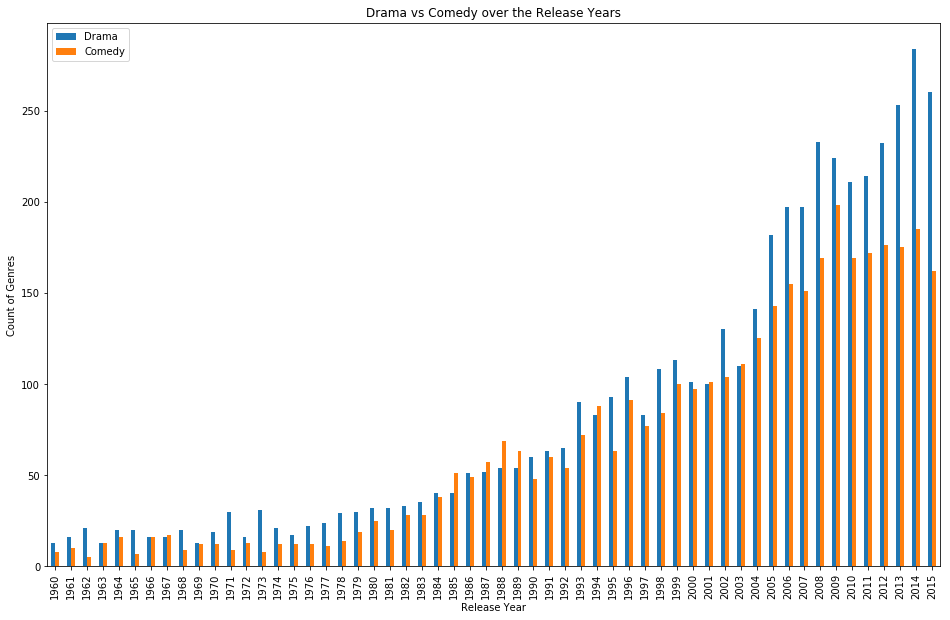

In [12]:
#comparison between genres of 'Drama' and 'Comedy' according to release year
for genre in genres_unique:
    df[genre] = np.where(df['genres'].str.contains(genre), 1, 0)
    
    
df_year_collect = df.groupby('release_year')[genres_unique].agg('sum')

df_year_collect.loc[:,['Drama', 'Comedy']].plot.bar(figsize=(16,10))
plt.xlabel('Release Year')
plt.ylabel('Count of Genres')
plt.title('Drama vs Comedy over the Release Years')

#### Observation of Drama vs Comedy Plot
    From that plot: 
    This graphic compares drama and comedy films over the years. From the 1960s until the 1980s, the number of drama films was more than comedy films. From the mid-1980s to the early 1990s, the number of comedy movies was dramatic, but after the 1990s drama films were again the most produced.

### Research Question 2: Which genres had high revenues based on release year? Drama or Comedy?
     

Text(0.5,1,'Drama vs Comedy Average Revenue over the Release Years')

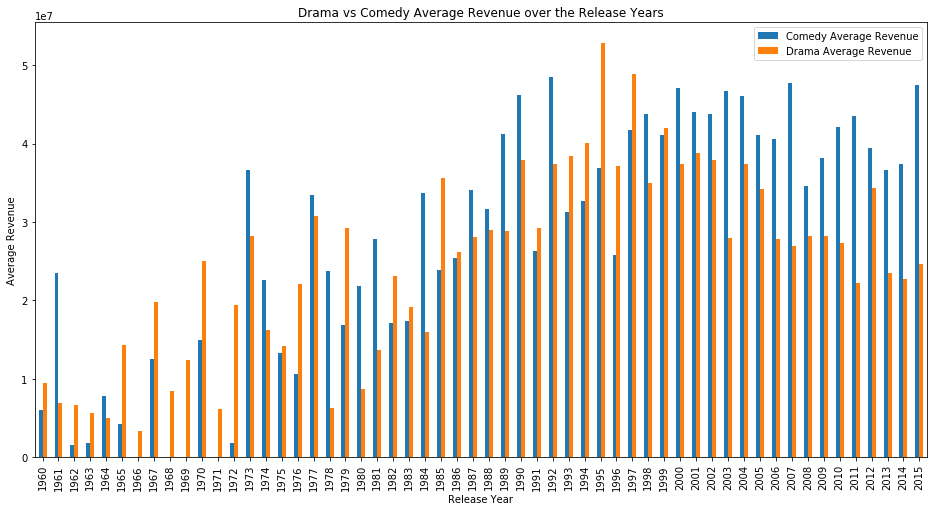

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df_revenue=pd.DataFrame({'Drama Average Revenue': df[df['Drama']==1].groupby('release_year')['revenue'].agg('mean'),
              'Comedy Average Revenue': df[df['Comedy']==1].groupby('release_year')['revenue'].agg('mean')})
                                                                                                
df_revenue.plot.bar(figsize=(16,8))   
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.title('Drama vs Comedy Average Revenue over the Release Years')

#### Observation of Average Revenue of Selected Genres
     In the previous analysis, although comedy films are few in number compared to drama films, it is observed that comedy films are more likely to be produced with higher revenue. the number of drama films has increased year by year, especially in 2000, but comedy films, which are few in number, have surpassed drama films in terms of revenue.

In [14]:
#details of comedy and drama films count and average revenue
df_revenue.head()
df_year_collect.head()
df_revenue= pd.merge(df_revenue,df_year_collect.loc[:,['Comedy','Drama']],how='left',left_index=True,right_index=True)
df_revenue


,Comedy Average Revenue,Drama Average Revenue,Comedy,Drama
release_year,,,,
1960,6.012500e+06,9.461538e+06,8,13
1961,2.343800e+07,6.971261e+06,10,16
1962,1.600000e+06,6.665707e+06,5,21
1963,1.873284e+06,5.596154e+06,13,13
1964,7.817611e+06,5.022014e+06,16,20
1965,4.278571e+06,1.434681e+07,7,20
1966,0.000000e+00,3.358543e+06,16,16
1967,1.257697e+07,1.977260e+07,17,16
1968,0.000000e+00,8.391109e+06,9,20


Text(0.5,1,'Drama vs Comedy Revenue/Count over the Release Years')

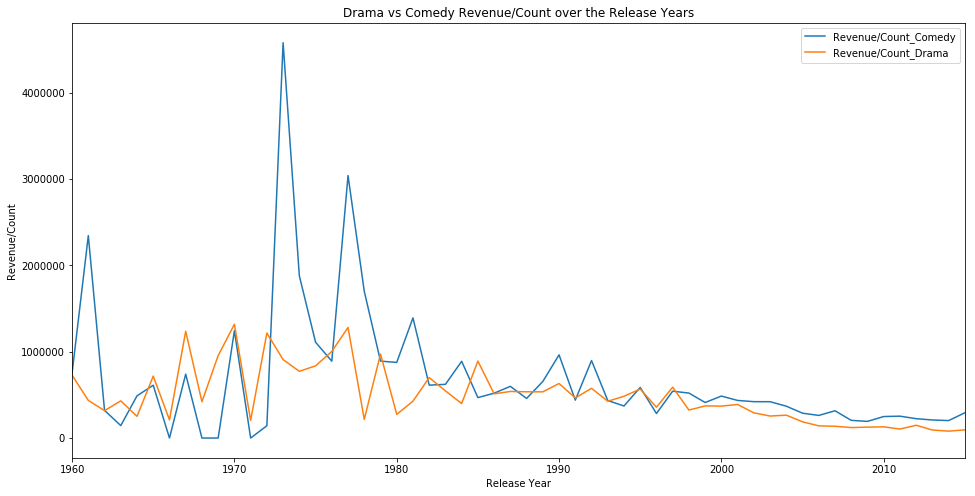

In [15]:
#Ratio of Comedy and Drama films based on Revenue/Count
df_revenue['Revenue/Count_Comedy']=df_revenue['Comedy Average Revenue']/df_revenue['Comedy']
df_revenue['Revenue/Count_Drama']=df_revenue['Drama Average Revenue']/df_revenue['Drama']
df_revenue[['Revenue/Count_Comedy','Revenue/Count_Drama']].plot(figsize=(16,8))
plt.xlabel('Release Year')
plt.ylabel('Revenue/Count')
plt.title('Drama vs Comedy Revenue/Count over the Release Years')

#### Observation of Revenue/Count Ratio
    This chart rates the films in drama and comedy genres as number and revenue. This graph proves that in terms of number, comedy films are higher-revenue films. Especially in the 1970s, comedy films reached the highest level.

In [16]:
#showing ratio according to std, mean, count etc.
df_revenue[['Revenue/Count_Comedy','Revenue/Count_Drama']].describe()

,Revenue/Count_Comedy,Revenue/Count_Drama
count,5.600000e+01,5.600000e+01
mean,6.826467e+05,4.911220e+05
std,7.742386e+05,3.290780e+05
min,0.000000e+00,7.993039e+04
25%,2.784213e+05,2.421582e+05
50%,4.632759e+05,4.265498e+05
75%,7.825073e+05,6.481757e+05
max,4.577516e+06,1.317166e+06


#### Observation of Revenues
     Comedy movies have revenues about maximum 4 times more than drama films, although they are similar in count as seen in detail above. 

<a id='conclusions'></a>
## Conclusions

> In this research, I chose TMDb movie data because of my intrest. 
  During this investigation, cleaning the dummy data in the dataset. I showed the information by columns using histograms. Then
  I chose some columns; genres, release years and revenues for answering my research questions.
  In the first research question, I chose 2 genres which are Drama and Comedy. Because I wanted to show which movie genres are the most release. As a result of this research, number of drama movies is more than comedy films according to dataset.
 
> There are some limitations of this dataset that some blank and N.A. values which can effect the count, std, min values of the dataset. One of the reasons for this success and the numbers in film genres may be time. Looking at the year-to-date, there are changes in the number of films produced according to the preferences of societies living in different years. However, it is observed that comedy films are produced less than drama movies, although the result is much.


In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0